In [4]:
import pandas as pd
# Direct URL (UCI Repository)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
df = pd.read_csv(
    url, 
    header=None, 
    names=[
        'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
    ],
    na_values='?'
)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [5]:
def numeric_columns(x):
    return pd.to_numeric(x, errors='coerce')
df = df.apply(numeric_columns)

In [6]:
import numpy as np


df['target'] = df['target'].apply(lambda x: 0 if x == 0 else 1)

# Handle missing values
df = df.replace('?', np.nan)  
df = df.dropna()

In [7]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['target'])
y =df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
import tensorflow as tf


model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

2025-02-04 00:16:41.314637: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5353 - loss: 2.8185 - val_accuracy: 0.7083 - val_loss: 1.6129
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4234 - loss: 2.3591 - val_accuracy: 0.6875 - val_loss: 0.7603
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4780 - loss: 1.1318 - val_accuracy: 0.4583 - val_loss: 1.0757
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6600 - loss: 0.7803 - val_accuracy: 0.6458 - val_loss: 0.7990
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6674 - loss: 0.8325 - val_accuracy: 0.7292 - val_loss: 0.7475
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7212 - loss: 0.6332 - val_accuracy: 0.4375 - val_loss: 0.8759
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6907 - loss: 0.6365 - val_accuracy: 0.7500 - val_loss: 0.6301
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7222 - loss: 0.5486 - val_accuracy: 0.7500 - val_loss: 0.5992
Epoch 9/50


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6854 - loss: 0.6292
Test Accuracy: 0.7000


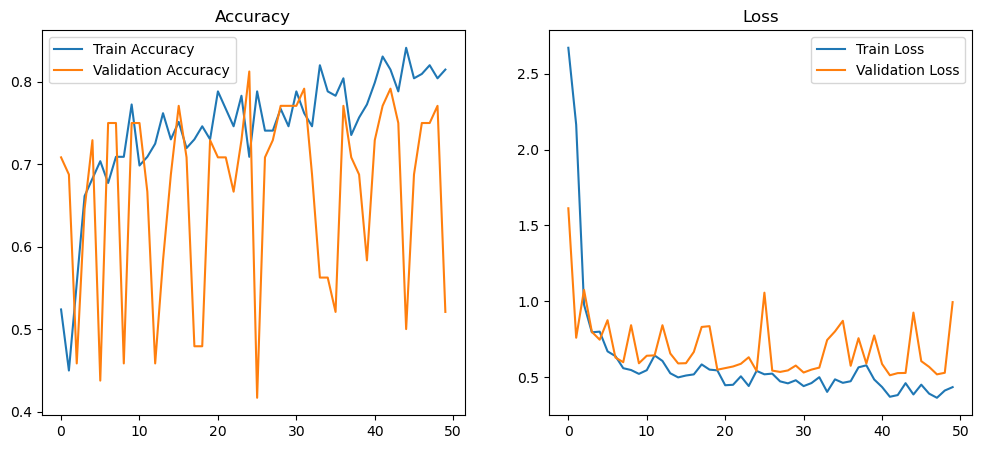

In [9]:
# Evaluate model
from matplotlib import pyplot as plt

# Ensure the model is defined by running the previous cells
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()
